<a href="https://colab.research.google.com/github/shishirjain/Solution-Machine-Learning-using-python.-Manaranjan-Pradhan/blob/main/Chapter_4_Linear_regression_Machine_Learning_using_Python_by_Manaranjan_Pradhan_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The dataset country.csv contains Corruption  Perception  Index  and  Gini  Index  of  20  countries.  Corruption Perception Index close to 100 indicates low corruption and close to 0 indicates high cor- ruption. Gini Index is a measure of income distribution among citizens of a country (high Gini indi- cates high inequality). Corruption Index is taken from Transparency International, while Gini Index  is sourced from Wikipedia.

In [57]:
df=pd.read_csv('/content/country.csv')
df.head()

,Country,Corruption_Index,Gini_Index
0,Hong Kong,77,53.7
1,South Korea,53,30.2
2,China,40,46.2
3,Italy,47,32.7
4,Mongolia,38,36.5


1. Develop a simple linear regression model (Y = b0 + b1X) between corruption perception index (Y) and Gini index (X). What is the change in the corruption perception index for every one unit increase in Gini index? 


In [58]:
m=sum((df.Gini_Index-df.Gini_Index.mean())*(df.Corruption_Index-df.Corruption_Index.mean()))/sum((df.Gini_Index-df.Gini_Index.mean())**2)
c=df.Corruption_Index.mean()-m*df.Gini_Index.mean()
m,c
#For every one unit increase in Gini index, Corruption dexre

(-1.2951931651912736, 106.69501055874485)

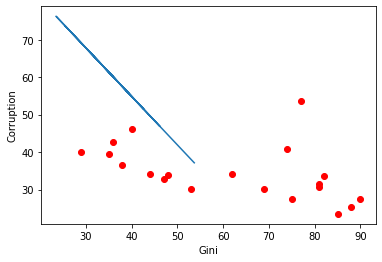

In [59]:
plt.scatter(df.Corruption_Index,df.Gini_Index,color='r')
plt.xlabel("Gini")
plt.ylabel("Corruption")
plt.plot(df['Gini_Index'],m*df['Gini_Index']+c)

In [60]:
import statsmodels.api as sm
X=sm.add_constant(df['Gini_Index'])
X.head()

,const,Gini_Index
0,1.0,53.7
1,1.0,30.2
2,1.0,46.2
3,1.0,32.7
4,1.0,36.5


In [61]:
Y=df['Corruption_Index']

In [62]:
country_lm=sm.OLS(Y,X).fit()

In [63]:
country_lm.params

const         106.695011
Gini_Index     -1.295193
dtype: float64

2.  What proportion of the variation in corruption perception index is explained by Gini index? 

In [64]:
Y_predict=country_lm.predict(X)

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score=r2_score(Y,Y_predict)
r2_score
#21.5% of the variation in corruption perception index is explained by Gini index?

0.21521228052302832

In [67]:
len(df)

20

In [68]:
n=len(X)
k=1
adj_r2_score=1-((1-r2_score)*(n-1)/(n-k-1))
adj_r2_score


0.1716129627743076

3.  Is there a statistically significant relationship between corruption perception index and Gini index 
at alpha value 0.1? 

In [69]:
country_lm.summary2(alpha=0.1),
#The p-value for the t-test is ~0.04 which indicates that there is a statistically significant relationship(at alpha=0.1)between the features

(<class 'statsmodels.iolib.summary2.Summary'>
 """
                  Results: Ordinary least squares
 Model:              OLS              Adj. R-squared:     0.172   
 Dependent Variable: Corruption_Index AIC:                175.9296
 Date:               2021-06-01 08:58 BIC:                177.9211
 No. Observations:   20               Log-Likelihood:     -85.965 
 Df Model:           1                F-statistic:        4.936   
 Df Residuals:       18               Prob (F-statistic): 0.0394  
 R-squared:          0.215            Scale:              352.12  
 ------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.05    0.95]  
 ------------------------------------------------------------------
 const       106.6950   20.6822   5.1588  0.0001  70.8307  142.5593
 Gini_Index   -1.2952    0.5830  -2.2217  0.0394  -2.3061   -0.2843
 -----------------------------------------------------------------
 Omnibus:              

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd569d87710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd569d87710>)

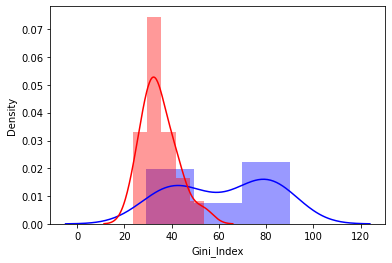

In [72]:
sns.distplot(df['Corruption_Index'],color='b'),sns.distplot(df['Gini_Index'],color='r')


4. Calculate the 95% confidence interval for the regression coefficient b1.

In [76]:
country_lm.summary2(alpha=0.05),
#https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/
#C.I=[-2.5200,	-0.0704]

(<class 'statsmodels.iolib.summary2.Summary'>
 """
                  Results: Ordinary least squares
 Model:              OLS              Adj. R-squared:     0.172   
 Dependent Variable: Corruption_Index AIC:                175.9296
 Date:               2021-06-01 09:32 BIC:                177.9211
 No. Observations:   20               Log-Likelihood:     -85.965 
 Df Model:           1                F-statistic:        4.936   
 Df Residuals:       18               Prob (F-statistic): 0.0394  
 R-squared:          0.215            Scale:              352.12  
 ------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025   0.975] 
 ------------------------------------------------------------------
 const       106.6950   20.6822   5.1588  0.0001  63.2433  150.1468
 Gini_Index   -1.2952    0.5830  -2.2217  0.0394  -2.5200   -0.0704
 -----------------------------------------------------------------
 Omnibus:              

DAD hospital data **NOT AVAILABLE** if you find it, let me know at shishirjain.sj@gmail.com
